In [1]:
# Install OpenCV if you haven't already
!pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display_image(title, img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

--2025-12-24 04:52:50--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91814 (90K) [image/jpeg]
Saving to: ‘sample_image.jpg’

sample_image.jpg    100%[===================>]  89.66K  --.-KB/s    in 0.02s   

2025-12-24 04:52:50 (5.40 MB/s) - ‘sample_image.jpg’ saved [91814/91814]

Image loaded successfully.


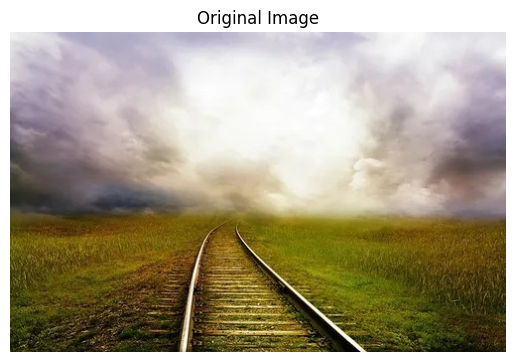

In [9]:
# Download a sample image
!wget -O sample_image.jpg https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg

# Load the image
image = cv2.imread('/content/railroad-163518_640.jpg')

if image is None:
    print("Error: Could not load image. Make sure 'sample_image.jpg' exists and is a valid image file.")
else:
    print("Image loaded successfully.")
    display_image('Original Image', image)

Original dimensions: 500x323
Scaled dimensions: 250x162


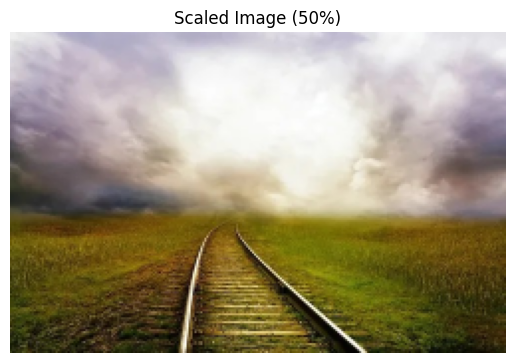

In [10]:
# Scaling - resize the image
# Define the scaling factors
scale_x = 0.5  # Scale down to 50% of original width
scale_y = 0.5  # Scale down to 50% of original height

# Use cv2.resize for scaling
# INTER_AREA for shrinking, INTER_CUBIC or INTER_LINEAR for zooming
scaled_image = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_AREA)

print(f"Original dimensions: {image.shape[1]}x{image.shape[0]}")
print(f"Scaled dimensions: {scaled_image.shape[1]}x{scaled_image.shape[0]}")
display_image('Scaled Image (50%)', scaled_image)

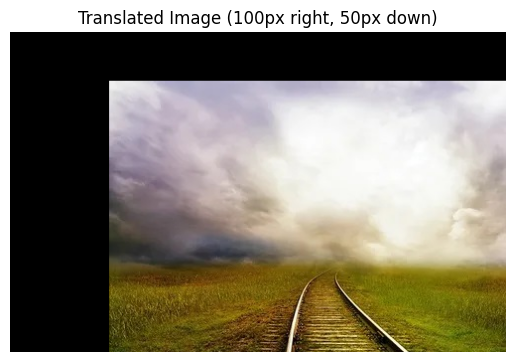

In [11]:
# Translation - shifting the image
# Define the shift amounts (tx, ty)
tx = 100 # Shift 100 pixels to the right
ty = 50  # Shift 50 pixels down

# Create the 2x3 transformation matrix M
M_translate = np.float32([[1, 0, tx],
                        [0, 1, ty]])

# Get image dimensions
rows, cols, _ = image.shape

# Apply the affine transformation
translated_image = cv2.warpAffine(image, M_translate, (cols, rows))

display_image('Translated Image (100px right, 50px down)', translated_image)

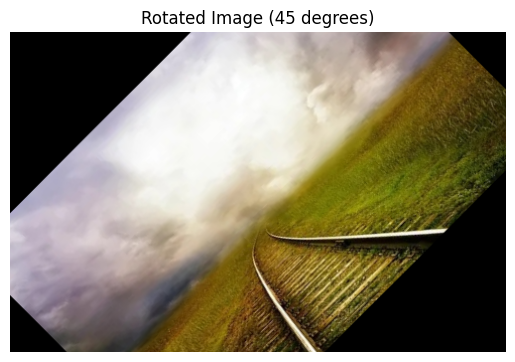

In [12]:
# Rotation - rotating the image
# Get image dimensions
rows, cols, _ = image.shape

# Define the rotation parameters
angle = 45  # Rotate by 45 degrees
center = (cols / 2, rows / 2)  # Rotate around the center of the image
scale = 1.0   # No scaling

# Get the 2x3 rotation matrix
M_rotate = cv2.getRotationMatrix2D(center, angle, scale)

# Apply the affine transformation
rotated_image = cv2.warpAffine(image, M_rotate, (cols, rows))

display_image('Rotated Image (45 degrees)', rotated_image)